In [6]:
# сделайте DataFrame с колонкой "Salary" со значениями [145000, 152000, 161000].
# 1) Преобразуйте их в строки вида "45000 руб." и сохраните в новой колонке.
# 2) Из полученных строк извлеките обратно числа и приведите их к типу int во второй новой колонке.


# используйте .astype(str) + конкатенацию; для извлечения - .str.replace(" руб.", "", regex=False) + .astype(int)
#            или .str.extract(r'(\d+)') + .astype(int).


import pandas as pd

# Исходный DataFrame со столбцом Salary.
df = pd.DataFrame({"Salary": [145000, 152000, 161000]})
# print(df)
# Преобразуем числа в строковый формат вида "145000 руб.".
# Вариант A (прямолинейный): .astype(str) + конкатенация со строкой " руб."
df["Salary_str"] = df["Salary"].astype(str) + " руб."
# print(df)
# Вариант B (регулярками): .astype(str).str.replace(...) здесь не нужен, просто пример альтернативы.
# df["Salary_str"] = df["Salary"].astype(str).str.cat([" руб."] * len(df))  # эквивалентный приём
# print(df)
# Извлекаем обратно числа в новый столбец и приводим к int.
# Способ 1: убрать фиксированный суффикс " руб." (без регекспов) и привести к int.
df["Salary_back_1"] = df["Salary_str"].str.replace(" руб.", "", regex=False).astype(int)

# print(df)

#  Способ 2: через регулярное выражение - выцепить группу цифр.
df["Salary_back_2"] = df["Salary_str"].str.extract(r"(\d+)").astype(int)

print(df)
print("\nТипы столбцов:\n", df.dtypes)


   Salary   Salary_str  Salary_back_1  Salary_back_2
0  145000  145000 руб.         145000         145000
1  152000  152000 руб.         152000         152000
2  161000  161000 руб.         161000         161000

Типы столбцов:
 Salary            int64
Salary_str       object
Salary_back_1     int64
Salary_back_2     int64
dtype: object


In [7]:
# Постройте DataFrame с колонкой "URL" (например: ["https://site.org", "http://example.com", "https://docs.org"]).
# Отфильтруйте строки, где адрес оканчивается на ".org".


# примените булеву маску через .str.contains(r'\.org$', regex=True) и индексацию df[mask].

df = pd.DataFrame({
    "URL": ["https://site.org", "http://example.com", "https://docs.org", "https://gov.ru"]
})

# Булева маска: адрес оканчивается на ".org" — используем привязку к концу строки через $.
mask = df["URL"].str.contains(r"\.org$", regex=True)

# Фильтрация строк по маске.
df_org = df[mask].copy()

print("Все URL:\n", df)
print("\nТолько .org:\n", df_org)


Все URL:
                   URL
0    https://site.org
1  http://example.com
2    https://docs.org
3      https://gov.ru

Только .org:
                 URL
0  https://site.org
2  https://docs.org


In [8]:
# Постройте DataFrame с колонкой "Record" со строками формата "id=105; user=Alice; score=92".
# Извлеките user и score в отдельные колонки (user — строка, score — число).


# используйте .str.extract(r'user=([^;]+);\s*score=(\d+)'), затем для score — .astype(int).


df = pd.DataFrame({
    "Record": [
        "id=105; user=Alice; score=92",
        "id=106; user=Bob; score=88",
        "id=107; user=Carol; score=95"
    ]
})

# Извлекаем user (строка) и score (число) через .str.extract с ИМЕНОВАННЫМИ группами.
extracted = df["Record"].str.extract(r"user=(?P<user>[^;]+);\s*score=(?P<score>\d+)")
extracted["score"] = extracted["score"].astype(int)  # приведение к числу

# Объединяем с исходным DataFrame при желании.
df = pd.concat([df, extracted], axis=1)

print(df)
print("\nТипы столбцов:\n", df.dtypes)

                         Record   user  score
0  id=105; user=Alice; score=92  Alice     92
1    id=106; user=Bob; score=88    Bob     88
2  id=107; user=Carol; score=95  Carol     95

Типы столбцов:
 Record    object
user      object
score      int64
dtype: object


In [9]:
# создайте Series со значениями [5, 10, 15]. Добавьте в конец значения [20, 25],
# а затем добавьте значение [0] в начало. Перенумеруйте индексы по порядку.


# объединяйте серии через pd.concat([s, pd.Series([...])], ignore_index=True);
#            для добавления в начало — pd.concat([pd.Series([0]), s], ignore_index=True).


s = pd.Series([5, 10, 15])

# Добавляем в конец значения [20, 25].
s = pd.concat([s, pd.Series([20, 25])], ignore_index=True)

# Добавляем в начало значение [0].
s = pd.concat([pd.Series([0]), s], ignore_index=True)

# Индекс уже перенумерован благодаря ignore_index=True.
print(s)
print("Индекс:", s.index)

0     0
1     5
2    10
3    15
4    20
5    25
dtype: int64
Индекс: RangeIndex(start=0, stop=6, step=1)


In [10]:
# создайте DataFrame с колонками "Name", "Age" и тремя строками.
# Добавьте сразу две новые строки с теми же колонками.


# сформируйте отдельный DataFrame с новыми строками и объедините через pd.concat([...], ignore_index=True).

df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Carol"],
    "Age":  [25, 31, 29]
})

# Новый DataFrame с двумя строками тех же колонок.
new_rows = pd.DataFrame({
    "Name": ["Dave", "Eve"],
    "Age":  [34, 22]
})

# Объединяем построчно, перенумеровываем индекс.
df_all = pd.concat([df, new_rows], ignore_index=True)

print(df_all)

    Name  Age
0  Alice   25
1    Bob   31
2  Carol   29
3   Dave   34
4    Eve   22


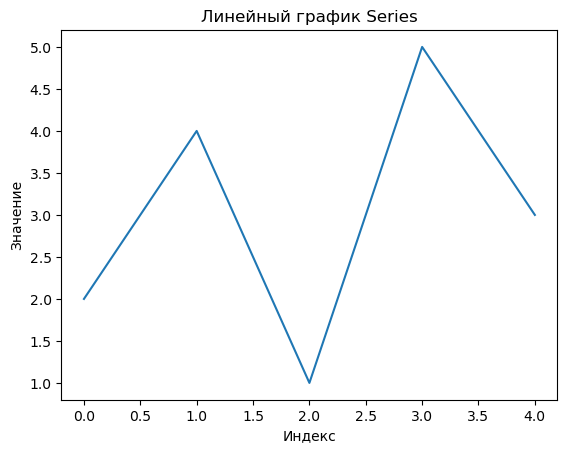

In [11]:
# создайте Series с числовыми значениями (например, [2, 4, 1, 5, 3]) и постройте линейный график.
# Добавьте заголовок и подписи осей.


# используйте .plot(kind='line'), затем plt.title(...), plt.xlabel(...), plt.ylabel(...), plt.show().

import matplotlib.pyplot as plt


s = pd.Series([2, 4, 1, 5, 3], name="Value")

# Линейный график (kind='line' по умолчанию).
ax = s.plot(kind="line")

# Подписи и оформление.
plt.title("Линейный график Series")
plt.xlabel("Индекс")
plt.ylabel("Значение")

# Отобразить график.
plt.show()

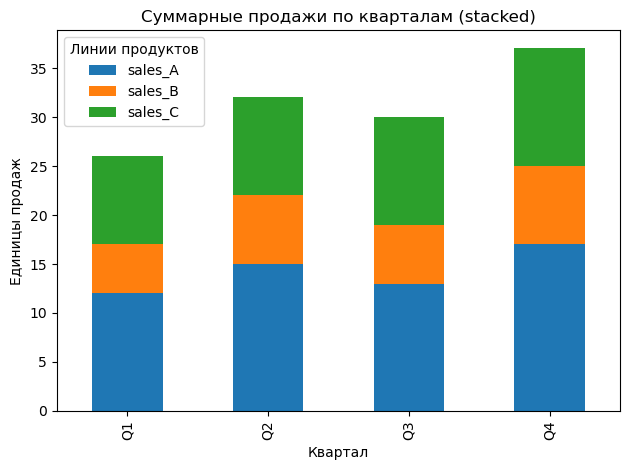

In [12]:
# создайте DataFrame с тремя числовыми колонками одинаковой длины (например, sales_A, sales_B, sales_C).
# Постройте "стековую" столбчатую диаграмму (stacked bar) для сравнения вкладов по строкам.

# df.plot(kind='bar', stacked=True); дополнительно подпишите оси и легенду (plt.xlabel, plt.ylabel, plt.legend).
df = pd.DataFrame({
    "sales_A": [12, 15, 13, 17],
    "sales_B": [ 5,  7,  6,  8],
    "sales_C": [ 9, 10, 11, 12],
}, index=["Q1", "Q2", "Q3", "Q4"])  # например, кварталы

# Стековая диаграмма: stacked=True суммирует "вклад" столбцов по строкам.
ax = df.plot(kind="bar", stacked=True)

# Подписи и легенда.
plt.title("Суммарные продажи по кварталам (stacked)")
plt.xlabel("Квартал")
plt.ylabel("Единицы продаж")
plt.legend(title="Линии продуктов")

plt.tight_layout()
plt.show()

In [15]:
# создайте словарь "product" с полями: name, price, qty. Обновите price (новым значением),
# добавьте булев ключ in_stock и выведите все ключи и значения словаря.


# используйте присваивание product['key'] = value или product.update(...); для просмотра — .keys(), .values(), .items().

# операции со словарём
product = {"name": "Mug", "price": 399, "qty": 12}

# Обновляем price (прямое присваивание).
product["price"] = 429

# Добавляем булев ключ in_stock.
product["in_stock"] = product["qty"] > 0  # True, если есть остаток

# Просматриваем содержимое словаря.
print("Ключи:", list(product.keys()))
print("Значения:", list(product.values()))
print("Пары:", list(product.items()))

Ключи: ['name', 'price', 'qty', 'in_stock']
Значения: ['Mug', 429, 12, True]
Пары: [('name', 'Mug'), ('price', 429), ('qty', 12), ('in_stock', True)]


In [16]:
# преобразуйте список словарей вида [{'City': 'Moscow', 'Population': 12.6}, ...] в DataFrame.
# Сделайте 'City' индексом и отсортируйте по 'Population' по убыванию.


# pd.DataFrame(list_of_dicts); затем .set_index('City') и .sort_values('Population', ascending=False).


# список словарей -> DataFrame -> индекс -> сортировка
cities = [
    {"City": "Moscow", "Population": 12.6},
    {"City": "Kazan",  "Population": 1.3},
    {"City": "SPb",    "Population": 5.4},
]

df_cities = pd.DataFrame(cities)
df_cities = df_cities.set_index("City").sort_values("Population", ascending=False)

print("\nDataFrame по городам (с индексом и сортировкой):\n", df_cities)



DataFrame по городам (с индексом и сортировкой):
         Population
City              
Moscow        12.6
SPb            5.4
Kazan          1.3


In [17]:
# создайте DataFrame с колонками "Name" и "BirthYear". Добавьте вычисляемую колонку "Age" как 2025 - BirthYear.


# используйте арифметику по столбцам (df['Age'] = 2025 - df['BirthYear']) или метод .assign(Age=...).

df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Carol"],
    "BirthYear": [1999, 1990, 1985]
})

# Вариант A: прямое присваивание
df["Age"] = 2025 - df["BirthYear"]

# Вариант B: через .assign (удобен для "цепочек" операций)
# df = df.assign(Age=2025 - df["BirthYear"])

print(df)

    Name  BirthYear  Age
0  Alice       1999   26
1    Bob       1990   35
2  Carol       1985   40


In [18]:
# сохраните произвольный DataFrame в Excel (лист "Data"), затем прочитайте его обратно в DataFrame.
# После этого сохраните те же данные в CSV (без индекса) и JSON (orient='records'), прочитайте оба файла обратно.
# На каждом шаге выводите форму и типы данных.


# .to_excel(path, index=False, sheet_name='Data') и pd.read_excel(..., sheet_name='Data');
#            .to_csv(path, index=False) и pd.read_csv(...);
#            .to_json(path, orient='records', force_ascii=False) и pd.read_json(path, orient='records').


df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Carol"],
    "Score": [85, 90, 95],
    "Passed": [True, True, True],
})

# === Excel ===
excel_path = "data.xlsx"
# Запись: один лист "Data".
df.to_excel(excel_path, index=False, sheet_name="Data")

# Чтение обратно: указываем имя листа, чтобы получить именно его.
df_xls = pd.read_excel(excel_path, sheet_name="Data")
print("Excel -> shape:", df_xls.shape)
print("Excel -> dtypes:\n", df_xls.dtypes, "\n")

# === CSV ===
csv_path = "data.csv"
df.to_csv(csv_path, index=False)

df_csv = pd.read_csv(csv_path)
print("CSV -> shape:", df_csv.shape)
print("CSV -> dtypes:\n", df_csv.dtypes, "\n")

# === JSON ===
json_path = "data.json"
# orient='records' - массив объектов; force_ascii=False - сохранить Unicode как есть (русские/иные символы).
df.to_json(json_path, orient="records", force_ascii=False)

df_json = pd.read_json(json_path, orient="records")
print("JSON -> shape:", df_json.shape)
print("JSON -> dtypes:\n", df_json.dtypes)

Excel -> shape: (3, 3)
Excel -> dtypes:
 Name      object
Score      int64
Passed      bool
dtype: object 

CSV -> shape: (3, 3)
CSV -> dtypes:
 Name      object
Score      int64
Passed      bool
dtype: object 

JSON -> shape: (3, 3)
JSON -> dtypes:
 Name      object
Score      int64
Passed      bool
dtype: object
